We will be building an image classification model using the Tensorflow package. We will fit the model on the CIFAR-10 dataset. The CIFAR-10 dataset consists of 50,000 labeled images for training and 10,000 labeled images for testing. The dataset is divided into 10 mutually exclusive classes, with each class representing a different object category. Here are the classes in CIFAR-10: Airplane, Automobile (Car), Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. Our goal is to correctly classify each image.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


2023-06-24 22:05:09.427370: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-24 22:05:09.559618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 22:05:10.032405: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 22:05:10.038344: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 22:05:13.494168: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In this step, we load the CIFAR-10 dataset and store the training and tests sets in the correct variables. We divide the image pixels by 255 so we can normalize the values between 0 and 1.

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In this step, we define the architecture of the CNN model using the Keras Sequential API. The Sequential model allows us to stack layers one after another.

We start by adding a Conv2D layer, which performs convolutional operations on the input images. Here, we use 32 filters with a kernel size of (3, 3). The activation function used is ReLU (Rectified Linear Unit), which introduces non-linearity to the model and helps capture complex patterns.

After the convolutional layer, we add a MaxPooling2D layer. This layer reduces the spatial dimensions of the output from the previous layer by taking the maximum value within a specific window size (2x2). It helps in reducing the computational complexity and extracting important features.

We repeat this pattern by adding another Conv2D layer followed by a MaxPooling2D layer, increasing the number of filters to 64. This allows the model to learn more complex features.

Next, we add a final Flatten layer, which reshapes the 3D feature maps into a 1D vector, preparing them for input into the fully connected layers.

We then add two fully connected (Dense) layers. The first dense layer has 64 units with a ReLU activation function, which introduces non-linearity. The final dense layer has 10 units, representing the 10 classes in the CIFAR-10 dataset. Since we want the model to output the raw logits, we don't apply an activation function here.

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 22s 13ms/step - loss: 1.5225 - accuracy: 0.4472 - val_loss: 1.2455 - val_accuracy: 0.5508
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1819 - accuracy: 0.5815 - val_loss: 1.1763 - val_accuracy: 0.5842
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0258 - accuracy: 0.6394 - val_loss: 1.0585 - val_accuracy: 0.6310
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9351 - accuracy: 0.6744 - val_loss: 0.9979 - val_accuracy: 0.6495
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8614 - accuracy: 0.6983 - val_loss: 0.9241 - val_accuracy: 0.6781
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8005 - accuracy: 0.7197 - val_loss: 0.9347 - val_accuracy: 0.6782
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7524 - accuracy: 0.7364 - val_loss: 0.8834 -

In this step, we define the loss function, optimizer, and evaluation metric for the model.

For the loss function, we use SparseCategoricalCrossentropy since we have integer labels (0 to 9) in the CIFAR-10 dataset.

As for the optimizer, we use the popular Adam optimizer, which adapts the learning rate during training to help the model converge faster.

To evaluate the model's performance, we choose the accuracy metric.

Once the model is compiled, we can train it using the fit method. We provide the training data (train_images and train_labels) and specify the number of epochs (10 in this case) and the batch size (128 in this case).

During training, the model iteratively updates its parameters to minimize the defined loss function. The validation split of 0.2 indicates that 20% of the training data is used for validation, which helps monitor the model's performance on unseen data and detect overfitting.

In [5]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 1s - loss: 0.8693 - accuracy: 0.7077 - 1s/epoch - 5ms/step
Test accuracy: 0.7077000141143799


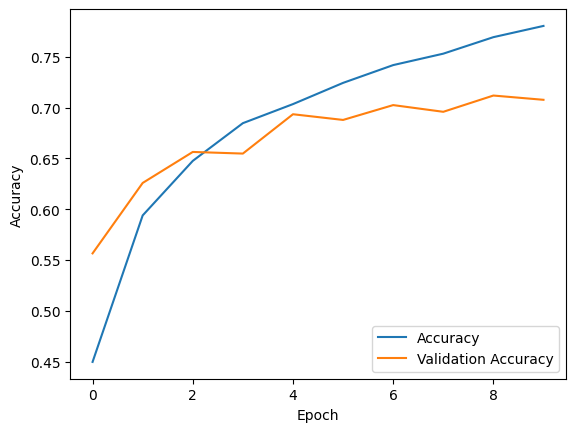

In [6]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
